## 1. Load bioactivity data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('2_bioactivity_data_PROCESSED_Data_Collection_part.csv')

In [3]:
df

,molecule_chembl_id,canonical_smiles,standard_value,0
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0,inactive
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0,inactive
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0,inactive
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0,inactive
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0,inactive
...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0,inactive
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0,intermediate
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0,intermediate
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0,intermediate


## 2. Calculate Lipinski Descriptors

### 2.1 Import libraries

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### 2.2 Caculate descriptors

In [5]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [6]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,580.682,2.68582,3.0,8.0
1,547.653,1.39862,4.0,8.0
2,581.670,1.59522,4.0,8.0
3,659.781,0.87060,6.0,9.0
4,625.764,0.67400,6.0,9.0
...,...,...,...,...
209,668.767,-2.95720,4.0,10.0
210,524.659,2.51690,3.0,7.0
211,628.721,-1.81440,4.0,10.0
212,468.551,0.95810,3.0,7.0


## 3. Combine Dataframes

In [7]:
df

,molecule_chembl_id,canonical_smiles,standard_value,0
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0,inactive
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0,inactive
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0,inactive
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0,inactive
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0,inactive
...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0,inactive
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0,intermediate
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0,intermediate
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0,intermediate


In [8]:
# Rename the bioactivity class column
df.columns = df.columns.str.replace('0', 'bioactivity_class')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0,inactive
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0,inactive
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0,inactive
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0,inactive
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0,inactive
...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0,inactive
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0,intermediate
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0,intermediate
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0,intermediate


In [9]:
# Combine the descriptors column to df

df2 = pd.concat([df, df_lipinski], axis=1)
df2

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0,inactive,580.682,2.68582,3.0,8.0
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0,inactive,547.653,1.39862,4.0,8.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0,inactive,581.670,1.59522,4.0,8.0
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0,inactive,659.781,0.87060,6.0,9.0
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0,inactive,625.764,0.67400,6.0,9.0
...,...,...,...,...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0,inactive,668.767,-2.95720,4.0,10.0
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0,intermediate,524.659,2.51690,3.0,7.0
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0,intermediate,628.721,-1.81440,4.0,10.0
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0,intermediate,468.551,0.95810,3.0,7.0


## 4. Convert IC50 to pIC50

The following function, norm_value will:
1. Cap the IC50 (standard_value column) to 100000000 so that after taking -log10, the value should not be less than 1.0
2. Delete the standard_value column and create new column, standard_value_norm

----
pIC50 = -log10(IC50)
The following function, pIC50 will:
1. Take the IC50 values (standard_value column) and convert it from nM to M by Multiplying the value by 10E-9
2. Take the molar value and apply -log10
3. Delete standard_value column and create a new column named pIC50


In [10]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [11]:
df3 = norm_value(df2)
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,580.682,2.68582,3.0,8.0,870000.0
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,547.653,1.39862,4.0,8.0,200000.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,300000.0
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,659.781,0.87060,6.0,9.0,15000.0
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,625.764,0.67400,6.0,9.0,10000.0
...,...,...,...,...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,inactive,668.767,-2.95720,4.0,10.0,4300.0
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,intermediate,524.659,2.51690,3.0,7.0,5500.0
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,intermediate,628.721,-1.81440,4.0,10.0,4100.0
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,intermediate,468.551,0.95810,3.0,7.0,3200.0


In [12]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [13]:
df4 = pIC50(df3)
df4

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,580.682,2.68582,3.0,8.0,3.060481
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,547.653,1.39862,4.0,8.0,3.698970
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,659.781,0.87060,6.0,9.0,4.823909
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,625.764,0.67400,6.0,9.0,5.000000
...,...,...,...,...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,inactive,668.767,-2.95720,4.0,10.0,5.366532
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,intermediate,524.659,2.51690,3.0,7.0,5.259637
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,intermediate,628.721,-1.81440,4.0,10.0,5.387216
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,intermediate,468.551,0.95810,3.0,7.0,5.494850


In [14]:
df4.pIC50.describe()

count    214.000000
mean       4.635885
std        0.619425
min        3.060481
25%        4.301030
50%        4.545166
75%        5.050691
max        6.795880
Name: pIC50, dtype: float64

In [52]:
df4.to_csv('3_COVID19_bioactivity_data_3class_pIC50_Exporatory_Data_Analysis_Part.csv', index=False)

## 5. Removing the 'intermediate' bioactivity class

In [15]:
df5 = df4[df4.bioactivity_class != 'intermediate']
df5

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,580.682,2.68582,3.0,8.0,3.060481
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,547.653,1.39862,4.0,8.0,3.698970
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,659.781,0.87060,6.0,9.0,4.823909
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,625.764,0.67400,6.0,9.0,5.000000
...,...,...,...,...,...,...,...,...
202,CHEMBL4214066,CC(C)C[C@H](NC(=O)OC1CCN(C(=O)OC(C)(C)C)CC1)C(...,inactive,496.605,1.73670,3.0,7.0,5.677781
203,CHEMBL4208240,CC(C)C[C@H](NC(=O)OC1CCN(C(=O)OC(C)(C)C)CC1)C(...,inactive,600.667,-2.59460,4.0,10.0,5.292430
205,CHEMBL4213159,CC(C)C[C@H](NC(=O)OC1CCN(S(C)(=O)=O)CC1)C(=O)N...,inactive,578.642,-4.57010,4.0,10.0,4.375718
208,CHEMBL4214471,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,inactive,564.705,1.37410,3.0,7.0,5.408935


## 6. Exploratory Data Analysis (EDA: chemical space analysis) via Lipinski descriptors

### 6.1 Import libraries

In [25]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### 6.2 Frequency plot of the 2 bioactivity classes

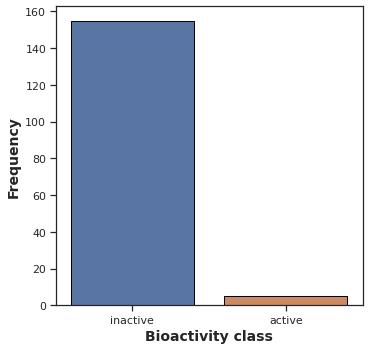

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df5, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('EDA_plot_bioactivity_class.pdf')

### 6.3 Scatter plot of MW vs LogP

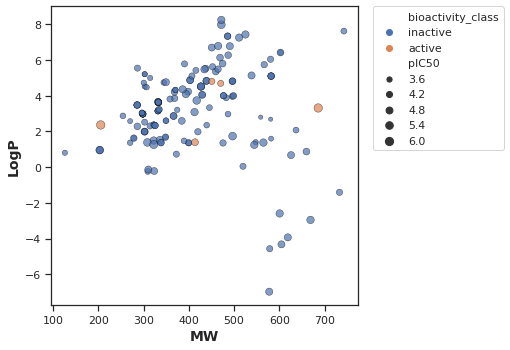

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df5, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

plt.savefig('EDA_plot_MS_vs_LogP.pdf')

### 6.4 EDA - Box Plots (EDA_BP)

#### 6.5 pIC50 value

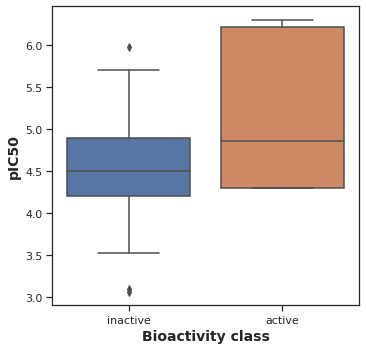

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='bioactivity_class', y='pIC50', data=df5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')

plt.savefig('EDA_BP_plot_pIC50.pdf')

In [49]:
! zip -r results.zip . -i *.csv *.pdf

  adding: EDA_plot_bioactivity_class.pdf (deflated 37%)
  adding: 2_bioactivity_data_PROCESSED_Data_Collection_part.csv (deflated 82%)
  adding: EDA_BP_plot_pIC50.pdf (deflated 38%)
  adding: EDA_plot_MS_vs_LogP.pdf (deflated 13%)
  adding: 1_bioactivity_data_Data_Collection_part.csv (deflated 90%)
